In [206]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np

In [207]:
df = pd.read_csv('../Pedestrian_Count_Top_5_sensor_location/Southern_VIC_Ped_Count.csv')
df = df.drop(columns = 'Unnamed: 0')
df

,date_new,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount
0,2015-01-01,13.3,26.9,23.600000,0.000,2592.0,2813.0
1,2015-01-02,15.4,38.8,26.800000,0.000,1848.0,4648.0
2,2015-01-03,20.0,38.2,26.500000,0.000,1451.0,1428.0
3,2015-01-04,16.3,21.4,25.200000,4.200,1047.0,1347.0
4,2015-01-05,15.0,22.0,30.700000,0.000,3416.0,11483.0
...,...,...,...,...,...,...,...
2430,2021-08-27,6.1,14.5,12.161574,3.488,NaN,NaN
2431,2021-08-28,8.8,20.7,12.163382,1.768,NaN,NaN
2432,2021-08-29,8.5,17.6,12.165101,2.032,NaN,NaN
2433,2021-08-30,9.2,19.3,12.166721,0.320,NaN,NaN


In [208]:

#check when is predicting-start day
df[df.date_new == '2021-03-01']

,date_new,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount
2251,2021-03-01,13.8,21.7,17.500288,1.672,NaN,NaN


<ipython-input-209-db212c028fa1>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


<AxesSubplot:title={'center':'SoutherCrossCount'}, ylabel='Pedestrain Count'>

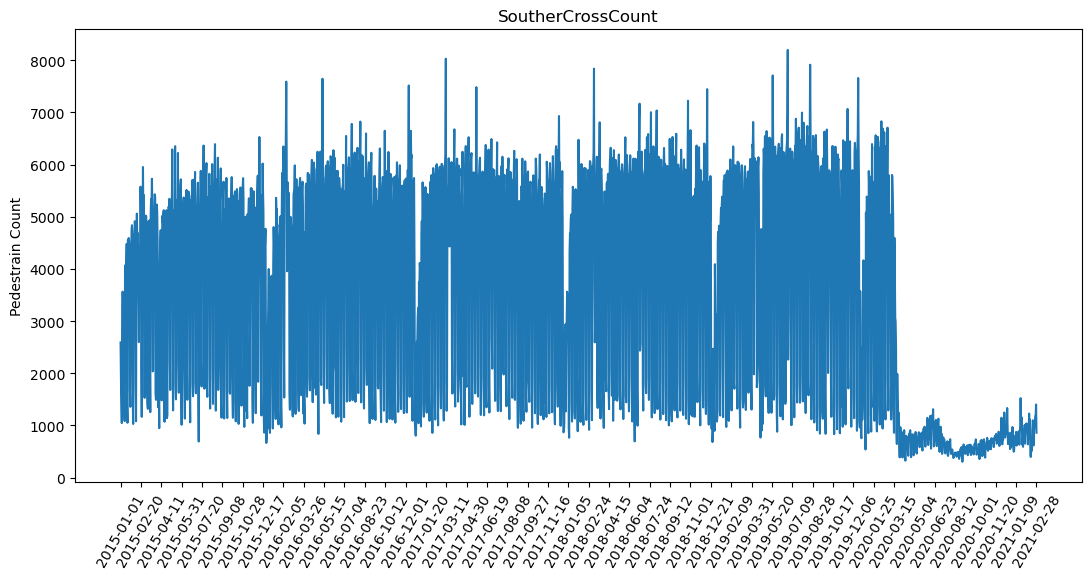

In [209]:
plt.figure(figsize=(13,6), dpi =100)
plt.plot(range(2251), df['SouthernCrossCount'][:2251])
ax = plt.subplot()
ax.set_xticks(range(0,2251,50))
ax.set_xticklabels(df['date_new'].loc[0:2251:50], rotation =60);
ax.set_title('SoutherCrossCount')

ax.set_ylabel('Pedestrain Count')
ax


<ipython-input-210-2afce74a2442>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


<AxesSubplot:title={'center':'VictoriaPointCount'}, ylabel='Pedestrain Count'>

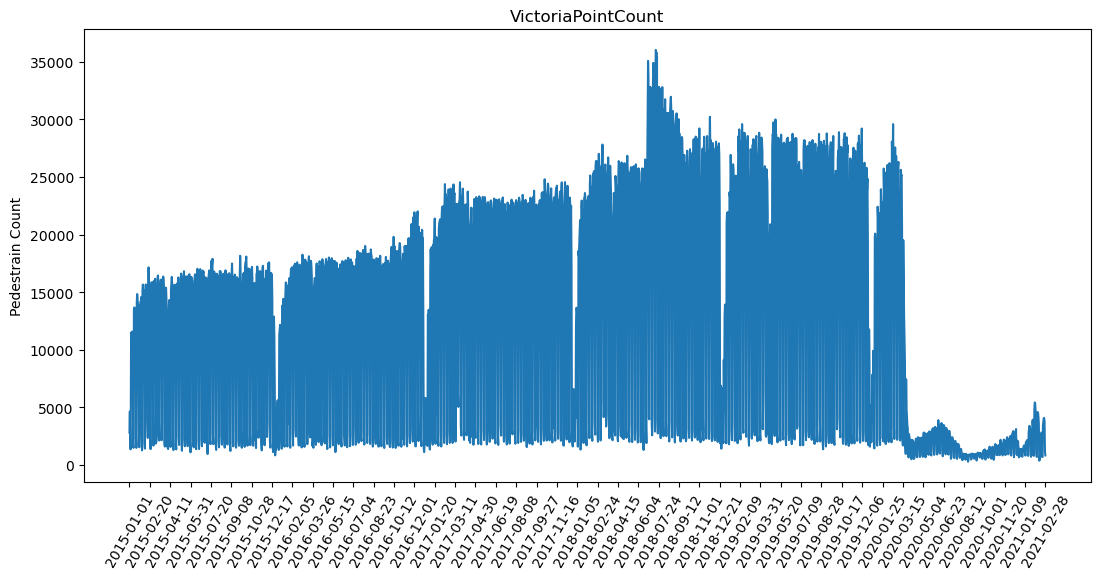

In [210]:
plt.figure(figsize=(13,6), dpi =100)
plt.plot(range(2251), df['VictoriaPointCount'][:2251])
ax = plt.subplot()
ax.set_xticks(range(0,2251,50))
ax.set_xticklabels(df['date_new'].loc[0:2251:50], rotation =60);
ax.set_title('VictoriaPointCount')

ax.set_ylabel('Pedestrain Count')
ax

,date_new,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,month,dayofweek,dayofyear,year
0,2015-01-01,13.3,26.9,23.600000,0.000,2592.0,2813.0,1,4,1,2015
1,2015-01-02,15.4,38.8,26.800000,0.000,1848.0,4648.0,1,5,2,2015
2,2015-01-03,20.0,38.2,26.500000,0.000,1451.0,1428.0,1,6,3,2015
3,2015-01-04,16.3,21.4,25.200000,4.200,1047.0,1347.0,1,7,4,2015
4,2015-01-05,15.0,22.0,30.700000,0.000,3416.0,11483.0,1,1,5,2015
...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,6.1,14.5,12.161574,3.488,NaN,NaN,8,5,239,2021
2431,2021-08-28,8.8,20.7,12.163382,1.768,NaN,NaN,8,6,240,2021
2432,2021-08-29,8.5,17.6,12.165101,2.032,NaN,NaN,8,7,241,2021
2433,2021-08-30,9.2,19.3,12.166721,0.320,NaN,NaN,8,1,242,2021


In [211]:
df['date_new'] = pd.to_datetime(df['date_new'])
df['month'] = df['date_new'].dt.month
df['dayofweek']= df['date_new'].dt.dayofweek+1
df['dayofyear'] = df['date_new'].dt.dayofyear
df['year'] = df['date_new'].dt.year


In [212]:
df = df.iloc[:,[0,-4,-3,-2,-1,1,2,3,4,5,6]]

In [213]:
X = df.iloc[:2251]

Y = df.iloc[2251:]

In [214]:
X

,date_new,month,dayofweek,dayofyear,year,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount
0,2015-01-01,1,4,1,2015,13.3,26.9,23.6,0.0,2592.0,2813.0
1,2015-01-02,1,5,2,2015,15.4,38.8,26.8,0.0,1848.0,4648.0
2,2015-01-03,1,6,3,2015,20.0,38.2,26.5,0.0,1451.0,1428.0
3,2015-01-04,1,7,4,2015,16.3,21.4,25.2,4.2,1047.0,1347.0
4,2015-01-05,1,1,5,2015,15.0,22.0,30.7,0.0,3416.0,11483.0
...,...,...,...,...,...,...,...,...,...,...,...
2246,2021-02-24,2,3,55,2021,13.0,20.2,23.3,0.0,1056.0,4046.0
2247,2021-02-25,2,4,56,2021,11.3,24.3,18.9,0.0,1185.0,4086.0
2248,2021-02-26,2,5,57,2021,13.3,19.7,15.7,0.4,1194.0,3790.0
2249,2021-02-27,2,6,58,2021,11.3,18.6,11.8,0.0,1403.0,1194.0


In [215]:
print(X.shape)
print(Y.shape)


(2251, 11)
(184, 11)


## Southern Cross station prediction

In [216]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X.iloc[:,1:-2], X.iloc[:,-2], test_size=0.3, shuffle=False)

In [217]:
X_train

,month,dayofweek,dayofyear,year,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres)
0,1,4,1,2015,13.3,26.9,23.6,0.0
1,1,5,2,2015,15.4,38.8,26.8,0.0
2,1,6,3,2015,20.0,38.2,26.5,0.0
3,1,7,4,2015,16.3,21.4,25.2,4.2
4,1,1,5,2015,15.0,22.0,30.7,0.0
...,...,...,...,...,...,...,...,...
1570,4,6,110,2019,10.2,30.2,13.9,0.0
1571,4,7,111,2019,14.8,27.0,7.5,0.0
1572,4,1,112,2019,13.7,17.6,6.0,0.8
1573,4,2,113,2019,11.1,18.5,8.0,0.0


In [218]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1575, 8)
(1575,)
(676, 8)
(676,)


In [219]:
from sklearn.preprocessing import StandardScaler
#using standard scaler
scaler = StandardScaler()
#fit get the mean and standard deviation of the train features 
#while tranform applies the standardation formular
X_train_StandardScaler = scaler.fit_transform(X_train) 
X_train_StandardScaler
X_test_StandardScaler = scaler.fit_transform(X_test) 
X_test_StandardScaler

array([[-0.79946758, -0.00443956, -0.71881297, ...,  0.28670782,
        -0.52455671, -0.35007166],
       [-0.79946758,  0.49575039, -0.70936502, ..., -0.67737507,
        -0.98912057,  0.23549855],
       [-0.79946758,  0.99594033, -0.69991707, ..., -0.60972013,
        -0.78822809, -0.35007166],
       ...,
       [-1.37655255,  0.49575039, -1.26679413, ..., -0.01773941,
         0.11578807, -0.27199563],
       [-1.37655255,  0.99594033, -1.25734618, ..., -0.20379049,
        -0.37388735, -0.35007166],
       [-1.37655255,  1.49613027, -1.24789823, ...,  1.16622204,
         1.07002734, -0.35007166]])

In [220]:
from sklearn.neighbors import KNeighborsRegressor
knn_max = KNeighborsRegressor(algorithm='ball_tree', leaf_size=10, metric='chebyshev',
                    n_neighbors=25)
knn_max.fit(X_train_StandardScaler,y_train )

KNeighborsRegressor(algorithm='ball_tree', leaf_size=10, metric='chebyshev',
                    n_neighbors=25)

In [221]:
predict_south= knn_max.predict(X_test_StandardScaler)


In [222]:
X_test

,month,dayofweek,dayofyear,year,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres)
1575,4,4,115,2019,10.2,21.5,10.6,0.0
1576,4,5,116,2019,11.9,15.8,6.9,3.0
1577,4,6,117,2019,8.7,16.2,8.5,0.0
1578,4,7,118,2019,12.4,17.4,5.2,0.0
1579,4,1,119,2019,11.5,18.1,8.4,0.0
...,...,...,...,...,...,...,...,...
2246,2,3,55,2021,13.0,20.2,23.3,0.0
2247,2,4,56,2021,11.3,24.3,18.9,0.0
2248,2,5,57,2021,13.3,19.7,15.7,0.4
2249,2,6,58,2021,11.3,18.6,11.8,0.0


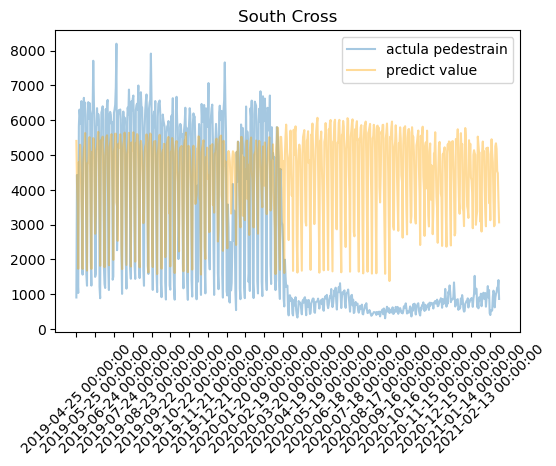

In [223]:
fig,ax = plt.subplots(dpi=100)
ax.plot(range(1575,2251),y_test, alpha =0.4)

ax.plot(range(1575,2251),predict_south, color = 'orange', alpha =0.4)

ax.set_xticks(range(1575,2251,30))
ax.set_xticklabels(X['date_new'].iloc[1575:2251:30], rotation =45);
ax.set_title('South Cross')
ax.legend(['actula pedestrain', 'predict value'])


In [224]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error, explained_variance_score, mean_absolute_percentage_error
predict_south
y_test
print(r2_score(y_test,predict_south,))
print(mean_absolute_error(y_test,predict_south))

-0.5456709577797858
2549.38023668639


In [227]:
Y.iloc[:,1:-2]

,month,dayofweek,dayofyear,year,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres)
2251,3,1,60,2021,13.8,21.7,17.500288,1.672
2252,3,2,61,2021,13.3,18.1,17.023478,0.184
2253,3,3,62,2021,14.2,17.7,16.966345,0.016
2254,3,4,63,2021,13.6,21.4,16.837059,1.024
2255,3,5,64,2021,15.0,18.0,16.607296,1.464
...,...,...,...,...,...,...,...,...
2430,8,5,239,2021,6.1,14.5,12.161574,3.488
2431,8,6,240,2021,8.8,20.7,12.163382,1.768
2432,8,7,241,2021,8.5,17.6,12.165101,2.032
2433,8,1,242,2021,9.2,19.3,12.166721,0.320


In [228]:
#prediction

south_test = scaler.fit_transform(Y.iloc[:,1:-2])
Y['south prediction']= knn_max.predict(south_test)


Y

<ipython-input-228-789f5d4eca09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['south prediction']= knn_max.predict(south_test)


,date_new,month,dayofweek,dayofyear,year,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,south prediction
2251,2021-03-01,3,1,60,2021,13.8,21.7,17.500288,1.672,NaN,NaN,4790.04
2252,2021-03-02,3,2,61,2021,13.3,18.1,17.023478,0.184,NaN,NaN,4949.60
2253,2021-03-03,3,3,62,2021,14.2,17.7,16.966345,0.016,NaN,NaN,4377.84
2254,2021-03-04,3,4,63,2021,13.6,21.4,16.837059,1.024,NaN,NaN,4714.24
2255,2021-03-05,3,5,64,2021,15.0,18.0,16.607296,1.464,NaN,NaN,4197.24
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,8,5,239,2021,6.1,14.5,12.161574,3.488,NaN,NaN,3684.96
2431,2021-08-28,8,6,240,2021,8.8,20.7,12.163382,1.768,NaN,NaN,2502.52
2432,2021-08-29,8,7,241,2021,8.5,17.6,12.165101,2.032,NaN,NaN,2622.36
2433,2021-08-30,8,1,242,2021,9.2,19.3,12.166721,0.320,NaN,NaN,5788.96


## VIC

In [229]:
X_train, X_test, y_train, y_test = train_test_split(
X.iloc[:,1:-2], X.iloc[:,-1], test_size=0.3, shuffle=False)

scaler = StandardScaler()

X_train_StandardScaler = scaler.fit_transform(X_train) 

X_test_StandardScaler = scaler.fit_transform(X_test) 


knn_max = KNeighborsRegressor(algorithm='ball_tree', leaf_size=10, metric='chebyshev',
                    n_neighbors=25)
knn_max.fit(X_train_StandardScaler,y_train)

forecast_vic = knn_max.predict(X_test_StandardScaler)

Text(0.5, 1.0, 'VIC Station')

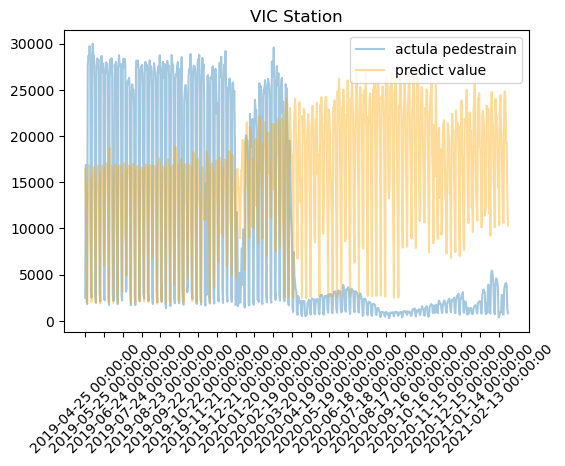

In [230]:
fig,ax = plt.subplots(dpi=100)
ax.plot(range(1575,2251),y_test, alpha =0.4)

ax.plot(range(1575,2251),forecast_vic, color = 'orange', alpha =0.4)

ax.set_xticks(range(1575,2251,30))
ax.set_xticklabels(X['date_new'].iloc[1575:2251:30], rotation =45);
ax.legend(['actula pedestrain', 'predict value'])
ax.set_title('VIC Station')

,month,dayofweek,dayofyear,year,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres)
2251,3,1,60,2021,13.8,21.7,17.500288,1.672
2252,3,2,61,2021,13.3,18.1,17.023478,0.184
2253,3,3,62,2021,14.2,17.7,16.966345,0.016
2254,3,4,63,2021,13.6,21.4,16.837059,1.024
2255,3,5,64,2021,15.0,18.0,16.607296,1.464
...,...,...,...,...,...,...,...,...
2430,8,5,239,2021,6.1,14.5,12.161574,3.488
2431,8,6,240,2021,8.8,20.7,12.163382,1.768
2432,8,7,241,2021,8.5,17.6,12.165101,2.032
2433,8,1,242,2021,9.2,19.3,12.166721,0.320


In [234]:
vic_test = scaler.fit_transform(Y.iloc[:,1:-3])
Y['vic prediction']= knn_max.predict(vic_test)

Y

<ipython-input-234-cc7bbd78ec48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['vic prediction']= knn_max.predict(vic_test)


,date_new,month,dayofweek,dayofyear,year,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,south prediction,vic prediction
2251,2021-03-01,3,1,60,2021,13.8,21.7,17.500288,1.672,NaN,NaN,4790.04,16314.56
2252,2021-03-02,3,2,61,2021,13.3,18.1,17.023478,0.184,NaN,NaN,4949.60,17638.52
2253,2021-03-03,3,3,62,2021,14.2,17.7,16.966345,0.016,NaN,NaN,4377.84,14802.48
2254,2021-03-04,3,4,63,2021,13.6,21.4,16.837059,1.024,NaN,NaN,4714.24,15999.68
2255,2021-03-05,3,5,64,2021,15.0,18.0,16.607296,1.464,NaN,NaN,4197.24,13773.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,8,5,239,2021,6.1,14.5,12.161574,3.488,NaN,NaN,3684.96,10948.40
2431,2021-08-28,8,6,240,2021,8.8,20.7,12.163382,1.768,NaN,NaN,2502.52,6663.80
2432,2021-08-29,8,7,241,2021,8.5,17.6,12.165101,2.032,NaN,NaN,2622.36,7748.88
2433,2021-08-30,8,1,242,2021,9.2,19.3,12.166721,0.320,NaN,NaN,5788.96,22112.48


In [237]:
X['Class'] = 'actual'
X

<ipython-input-237-2736cb9a4730>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Class'] = 'actual'


,date_new,month,dayofweek,dayofyear,year,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,Class
0,2015-01-01,1,4,1,2015,13.3,26.9,23.6,0.0,2592.0,2813.0,actual
1,2015-01-02,1,5,2,2015,15.4,38.8,26.8,0.0,1848.0,4648.0,actual
2,2015-01-03,1,6,3,2015,20.0,38.2,26.5,0.0,1451.0,1428.0,actual
3,2015-01-04,1,7,4,2015,16.3,21.4,25.2,4.2,1047.0,1347.0,actual
4,2015-01-05,1,1,5,2015,15.0,22.0,30.7,0.0,3416.0,11483.0,actual
...,...,...,...,...,...,...,...,...,...,...,...,...
2246,2021-02-24,2,3,55,2021,13.0,20.2,23.3,0.0,1056.0,4046.0,actual
2247,2021-02-25,2,4,56,2021,11.3,24.3,18.9,0.0,1185.0,4086.0,actual
2248,2021-02-26,2,5,57,2021,13.3,19.7,15.7,0.4,1194.0,3790.0,actual
2249,2021-02-27,2,6,58,2021,11.3,18.6,11.8,0.0,1403.0,1194.0,actual


In [239]:
Y['Class'] = 'predict'
Y.drop(columns=['SouthernCrossCount','VictoriaPointCount'], inplace=True)
Y= Y.rename(columns={'south prediction':'SouthernCrossCount',
                    'vic prediction':'VictoriaPointCount'})
Y

<ipython-input-239-a5e827b2236b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['Class'] = 'predict'
/Users/wuyoscar/opt/miniconda3/envs/py392/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,date_new,month,dayofweek,dayofyear,year,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,Class
2251,2021-03-01,3,1,60,2021,13.8,21.7,17.500288,1.672,4790.04,16314.56,predict
2252,2021-03-02,3,2,61,2021,13.3,18.1,17.023478,0.184,4949.60,17638.52,predict
2253,2021-03-03,3,3,62,2021,14.2,17.7,16.966345,0.016,4377.84,14802.48,predict
2254,2021-03-04,3,4,63,2021,13.6,21.4,16.837059,1.024,4714.24,15999.68,predict
2255,2021-03-05,3,5,64,2021,15.0,18.0,16.607296,1.464,4197.24,13773.64,predict
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,8,5,239,2021,6.1,14.5,12.161574,3.488,3684.96,10948.40,predict
2431,2021-08-28,8,6,240,2021,8.8,20.7,12.163382,1.768,2502.52,6663.80,predict
2432,2021-08-29,8,7,241,2021,8.5,17.6,12.165101,2.032,2622.36,7748.88,predict
2433,2021-08-30,8,1,242,2021,9.2,19.3,12.166721,0.320,5788.96,22112.48,predict


In [243]:
result = pd.concat([X,Y])
result

,date_new,month,dayofweek,dayofyear,year,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,Class
0,2015-01-01,1,4,1,2015,13.3,26.9,23.600000,0.000,2592.00,2813.00,actual
1,2015-01-02,1,5,2,2015,15.4,38.8,26.800000,0.000,1848.00,4648.00,actual
2,2015-01-03,1,6,3,2015,20.0,38.2,26.500000,0.000,1451.00,1428.00,actual
3,2015-01-04,1,7,4,2015,16.3,21.4,25.200000,4.200,1047.00,1347.00,actual
4,2015-01-05,1,1,5,2015,15.0,22.0,30.700000,0.000,3416.00,11483.00,actual
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,8,5,239,2021,6.1,14.5,12.161574,3.488,3684.96,10948.40,predict
2431,2021-08-28,8,6,240,2021,8.8,20.7,12.163382,1.768,2502.52,6663.80,predict
2432,2021-08-29,8,7,241,2021,8.5,17.6,12.165101,2.032,2622.36,7748.88,predict
2433,2021-08-30,8,1,242,2021,9.2,19.3,12.166721,0.320,5788.96,22112.48,predict


In [246]:
result.to_csv('Southern_VIC_prediciton.csv', index = False)